# Модель боевых действий

In [25]:
# считаем мой вариант:
# Данные
student_id = 1132226429 # Номер студенческого билета
num_variants = 70 # Количество вариантов

# Вычисление номера варианта
variant = (student_id % num_variants) + 1
print(variant)

20

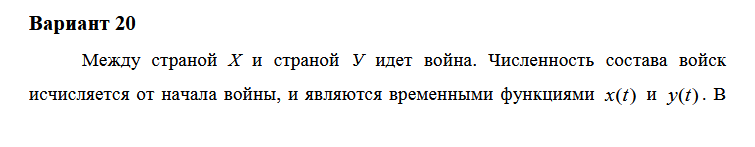
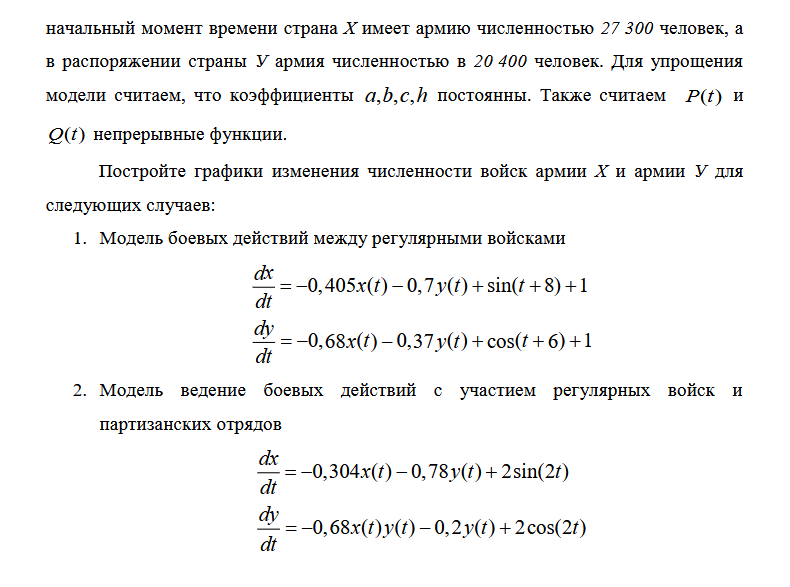

## Модель боевых действий между регулярными войсками

Численность регулярных войск определяется тремя факторами:
- скорость уменьшения численности войск из-за причин, не связанных с
боевыми действиями (болезни, травмы, дезертирство);
- скорость потерь, обусловленных боевыми действиями
противоборствующих сторон (что связанно с качеством стратегии,
уровнем вооружения, профессионализмом солдат и т.п.);
- скорость поступления подкрепления (задаётся некоторой функцией от
времени).

В этом случае модель боевых действий между регулярными войсками
описывается следующим образом


$$\begin{cases}
    \dfrac{dx}{dt} = -0.405x(t) - 0.7y(t)+sin(t+8) + 1\\
    \dfrac{dy}{dt} = -0.68x(t) - 0.37y(t)+cos(t+6) + 1
\end{cases}$$

- Потери, не связанные с боевыми действиями, описывают члены $-0.405x(t)$ и $-0.37y(t)$ (коэффиценты при $x$ и $y$ - это величины, характеризующие степень влияния различных факторов на потери)

- члены $-0.7y(t)$ и $-0.68x(t)$ отражают потери на поле боя (коэффиценты при  $x$ и $y$ указывают на эффективность боевых действий со стороны у и х соответственно).

- Функции $P(t) = sin(t+8) + 1$, $Q(t) = cos(t+6) + 1$ учитывают
возможность подхода подкрепления к войскам Х и У в течение одного дня.

In [27]:
# Импорт необходимых пакетов
# DifferentialEquations - решение дифференциальных уравнений
# Plots - визуализация результатов
using DifferentialEquations, Plots;

In [128]:
# Система дифференциальных уравнений боевой модели
# Нелинейная неавтономная система с внешними возмущениями:
# dx/dt = -a*x - b*y + sin(3t)  (динамика армии X)
# dy/dt = -c*x - h*y + cos(4t) + 2  (динамика армии Y)
# где:
# a, b, c, h - коэффициенты боевой эффективности
# sin/cos-функции - моделируют внешние факторы (подкрепления/потери)
function reg(u, p, t)
    x, y = u
    a, b, c, h = p
    dx = -a*x - b*y + sin(t+8) + 1
    dy = -c*x - h*y + cos(t+6) + 1
    return [dx, dy]
end

reg (generic function with 1 method)

In [129]:
# Параметры моделирования
# Начальные численности войск: [Армия X, Армия Y]
u0 = [27300, 20400]  
# Коэффициенты модели: [a, b, c, h]
p = [0.405, 0.7, 0.68, 0.37]  
# Временной интервал исследования (в днях/неделях)
tspan = (0, 1)  

(0, 1)

In [130]:
# Формулировка задачи Коши
# Создание объекта задачи для численного решения:
# - reg - функция системы
# - u0 - начальные условия
# - tspan - временной диапазон
# - p - вектор параметров
prob = ODEProblem(reg, u0, tspan, p)

# Численное решение системы
# Используется адаптивный метод Tsitouras 5/4 Runge-Kutta
# с автоматическим выбором шага для обеспечения точности
sol = solve(prob, Tsit5())

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 6-element Vector{Float64}:
 0.0
 0.09658829991273836
 0.3229858305694675
 0.612940225822225
 0.9604307961949677
 1.0
u: 6-element Vector{Vector{Float64}}:
 [27300.0, 20400.0]
 [24981.653525897458, 17999.20421465497]
 [20449.13093061515, 13217.831513544523]
 [16136.419165765368, 8483.72642474288]
 [12603.953569927355, 4310.664870025146]
 [12290.661569639798, 3915.648365507499]

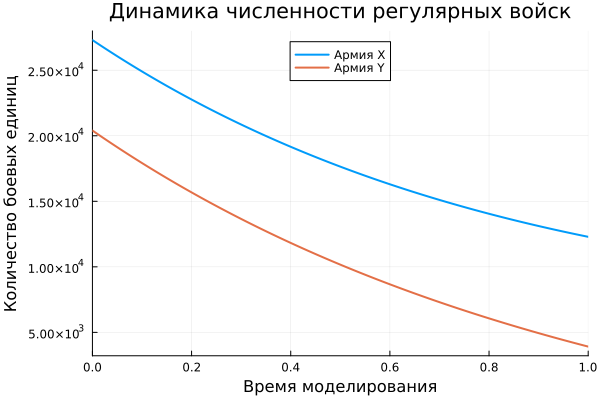

In [131]:
# Визуализация результатов
plot(sol, 
    title = "Динамика численности регулярных войск", 
    label = ["Армия X" "Армия Y"], 
    xaxis = "Время моделирования", 
    yaxis = "Количество боевых единиц",
    linewidth = 2,
    legend = :top)

## Модель ведение боевых действий с участием регулярных войск и партизанских отрядов

Во втором случае в борьбу добавляются партизанские отряды. Нерегулярные
войска в отличии от постоянной армии менее уязвимы, так как действуют скрытно,
в этом случае сопернику приходится действовать неизбирательно, по площадям,
занимаемым партизанами. Поэтому считается, что тем потерь партизан,
проводящих свои операции в разных местах на некоторой известной территории,
пропорционален не только численности армейских соединений, но и численности
самих партизан. В результате модель принимает вид:

$$\begin{cases}
    \dfrac{dx}{dt} = -0.304x(t)-0.78y(t)+2*sin(2t)\\
    \dfrac{dy}{dt} = -0.68x(t)y(t)-0.2y(t)+2*cos(2t)
\end{cases}$$

В этой системе все величины имею тот же смысл, что и в системе до этого.

- Потери, не связанные с боевыми действиями, описывают члены $-0.304x(t)$ и $-0.2y(t)$ (коэффиценты при $x$ и $y$ - это величины, характеризующие степень влияния различных факторов на потери)

- члены $-0.78y(t)$ и $-0.68x(t)y(t)$ отражают потери на поле боя (коэффиценты при  $x$ и $y$ указывают на эффективность боевых действий со стороны у и х соответственно). Функции $P(t) = 2*sin(2t)$, $Q(t) = 2*cos(2t)$ учитывают
возможность подхода подкрепления к войскам Х и У в течение одного дня.

In [124]:
# Модель ведение боевых действий с участием регулярных войск и партизанских отрядов

# Модель гибридного конфликта 
# Совместная система для регулярных войск (X) и партизанских формирований (Y)
# Нелинейное взаимодействие сил (член c*x*y)
# Асимметричные уравнения потерь
function reg_part(u, p, t)
    x, y = u
    a, b, c, h = p
    dx = -a*x - b*y + 2*sin(2*t)  # Потери от боев + циклические подкрепления
    dy = -c*x*y - h*y + 2*cos(2*t)  # Партизанские потери от взаимодействия
    return [dx, dy]
end

reg_part (generic function with 1 method)

In [125]:
# Исходные параметры конфликта
# Начальная численность: [Регулярные войска, Партизанские отряды]
u0 = [27300, 20400]  
# Коэффициенты: 
# [a - эффективность Y против X, 
#  b - потери X от партизан, 
#  c - интенсивность партизанской войны,
#  h - собственные потери Y]
p = [0.304, 0.78, 0.68, 0.2]  
# Масштаб времени: краткосрочный конфликт (1 условная единица)
tspan = (0, 0.0005)

(0, 0.0005)

In [126]:
# Формулировка расширенной задачи
# Учет нелинейного члена взаимодействия войск требует 
# специальных методов решения
prob2 = ODEProblem(reg_part, u0, tspan, p)

# Численное решение системы
# Используется адаптивный метод Tsitouras 5/4 Runge-Kutta
# с автоматическим выбором шага для обеспечения точности
sol2 = solve(prob2, Tsit5())

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 13-element Vector{Float64}:
 0.0
 5.947600374073083e-5
 8.627502553455399e-5
 0.00013048674337758144
 0.00016666381816658393
 0.0002089497315844996
 0.0002494613985798106
 0.0002922290672640608
 0.0003348369476897896
 0.000378385091787052
 0.00042211445058024794
 0.0004662964555932511
 0.0005
u: 13-element Vector{Vector{Float64}}:
 [27300.0, 20400.0]
 [27298.933776399466, 6771.4844181519275]
 [27298.599859901864, 4117.4905562453405]
 [27298.136104263882, 1812.4336946444305]
 [27297.798639704364, 926.0306119514082]
 [27297.426570657375, 422.4481950491863]
 [27297.081007705223, 199.16725995757236]
 [27296.721525477507, 90.0523739209105]
 [27296.365890906447, 40.837965476727824]
 [27296.003575411585, 18.199792350447545]
 [27295.640287224498, 8.083809255329625]
 [27295.273482945668, 3.5606559457330453]
 [27294.99375083076, 1.9048838207438563]

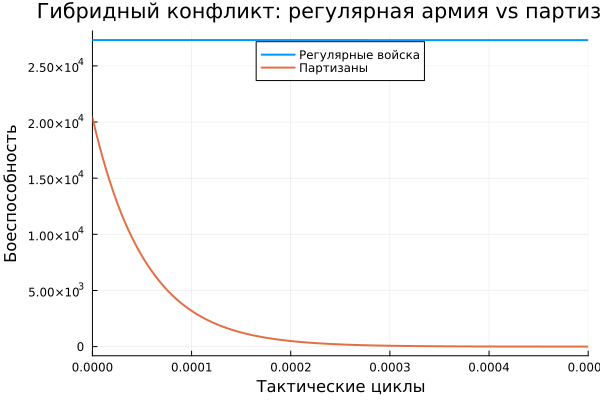

In [127]:
plot(sol2, 
    title = "Гибридный конфликт: регулярная армия vs партизаны", 
    label = ["Регулярные войска" "Партизаны"], 
    xaxis = "Тактические циклы", 
    yaxis = "Боеспособность",
    linewidth = 2,
    legend = :top)